In [1]:
"""
@Author: Mohammad Fatha
@Date: 2021-11-30
@Last Modified by: Mohammad Fatha
@Title : Program to insert a cpu log data.csv file from hdfs into hive database using pyhive library,and perform different query and also do visualization of the result.
"""
from pyhive import hive
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os
from dotenv import load_dotenv
load_dotenv(".env")


True

In [2]:
host_name = os.getenv("HOST_NAME")
port=os.getenv("PORT")
user=os.getenv("user")
password=os.getenv("password")


In [18]:
try:
        connection = hive.Connection(host=host_name, port=port, username=user,password=password)
        cur = connection.cursor()
        cur.execute(f"CREATE DATABASE HiveCpuDataLog")
        print("Database created successfully")
except Exception as e:
    print(e)

Database created successfully


In [19]:
try:
        connection = hive.Connection(host=host_name,port=port,username=user,password=password,database="HiveCpuDataLog")

        cur = connection.cursor()
        cur.execute("create table Cpudata(DateTime date,c1 string,c2 string,c3 string,c4 string,c5 string,c6 string,c7 string,c8 string,c9 string,c10 string,c11 string,c12 string,c13 string,c14 string,c15 string,c16 string,c17 string,c18 string,c19 string,c20 string,c21 string,c22 string,c23 string,c24 string,c25 string,c26 string,c27 string,c28 string,c29 string,c30 string,c31 string,c32 string,c33 string,c34 string,c35 string,c36 string,c37 string,c38 string,c39 string,user_name string,keyboard string,mouse string,c44 string,c45 string) row format delimited fields terminated by ',' stored as textfile location 'hdfs://localhost:9000/Spark/LogData/' tblproperties('skip.header.line.count'='1')")
        print("Table created successfully")

except Exception as e:
    print(e)

Table created successfully


In [11]:
try:
    conn = hive.Connection(host=host_name,port=port,database="HiveCpuDataLog")
    user_working_count = pd.read_sql("select user_name ,count('') as total from Cpudata where keyboard !=0 or mouse!=0 group by user_name",conn)
    print(user_working_count)
except Exception as e:
    print(e)

                      user_name  total
0  bhagyashrichalke21@gmail.com    287
1         damodharn21@gmail.com    191
2       deepshukla292@gmail.com    405
3            iamnzm@outlook.com    407
4     markfernandes66@gmail.com    389
5         rahilstar11@gmail.com    348
6      salinabodale73@gmail.com    370
7         sharlawar77@gmail.com    397


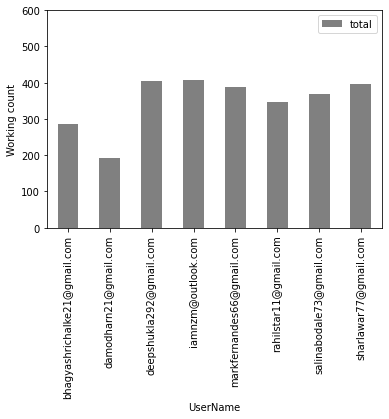

In [12]:
try:
    user_working_count.plot.bar(x='user_name', y='total',color = 'grey')
    plt.ylim(0,600)
    plt.xlabel("UserName")
    plt.ylabel("Working count")
    plt.show()
except Exception as e:
    print(e)

In [13]:
avg_work_sec=pd.read_sql("select user_name,((((count(''))*5)*60)/6) as average_working_sec from cpudata where keyboard!=0 or mouse!=0 group by user_name",conn)
print(avg_work_sec)

                      user_name  average_working_sec
0  bhagyashrichalke21@gmail.com              14350.0
1         damodharn21@gmail.com               9550.0
2       deepshukla292@gmail.com              20250.0
3            iamnzm@outlook.com              20350.0
4     markfernandes66@gmail.com              19450.0
5         rahilstar11@gmail.com              17400.0
6      salinabodale73@gmail.com              18500.0
7         sharlawar77@gmail.com              19850.0


In [14]:
average_work_hour = avg_work_sec[["user_name","average_working_sec"]]
average_work_hour["average_working_sec"]= pd.to_datetime(average_work_hour['average_working_sec'] ,unit='s').dt.strftime("%H:%M")
average_work_hour.rename(columns={'average_working_sec': 'average_working_hour'}, inplace=True)
print(average_work_hour,"\n")

print("Highest average working hour")
highest_average_work_hour=average_work_hour.max()
print(highest_average_work_hour,"\n")

print("Lowest average working hour")
lowest_average_work_hour=average_work_hour.min()
print(lowest_average_work_hour)

                      user_name average_working_hour
0  bhagyashrichalke21@gmail.com                03:59
1         damodharn21@gmail.com                02:39
2       deepshukla292@gmail.com                05:37
3            iamnzm@outlook.com                05:39
4     markfernandes66@gmail.com                05:24
5         rahilstar11@gmail.com                04:50
6      salinabodale73@gmail.com                05:08
7         sharlawar77@gmail.com                05:30 

Highest average working hour
user_name               sharlawar77@gmail.com
average_working_hour                    05:39
dtype: object 

Lowest average working hour
user_name               bhagyashrichalke21@gmail.com
average_working_hour                           02:39
dtype: object


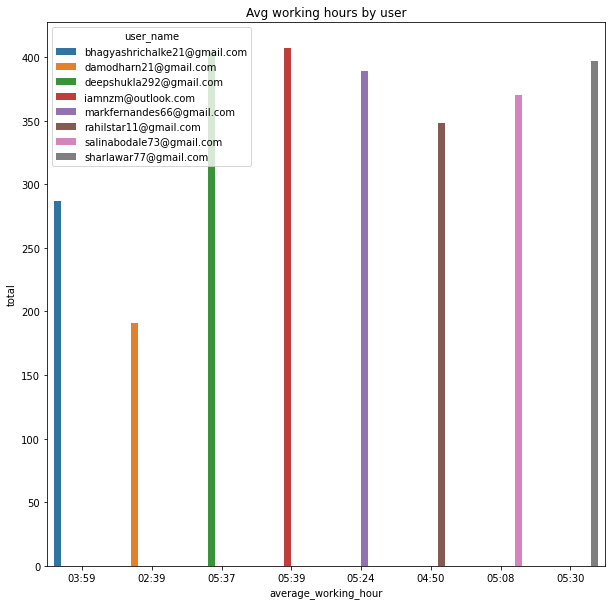

In [15]:
total = user_working_count['total']
plt.figure(figsize = (10,10))
sns.barplot(x = 'average_working_hour',y=total,data = average_work_hour,hue='user_name')
plt.title("Avg working hours by user")
plt.show()

In [5]:
try:
    conn = hive.Connection(host=host_name,port=port,database='HiveCpuDataLog')
    user_idle_count = pd.read_sql("select user_name ,count('') as total from cpudata where keyboard=0 or mouse=0 group by user_name",conn)
    print(user_idle_count)
except Exception as e:
    print(e)

                      user_name  total
0  bhagyashrichalke21@gmail.com    148
1         damodharn21@gmail.com    100
2       deepshukla292@gmail.com    242
3            iamnzm@outlook.com    230
4     markfernandes66@gmail.com    235
5         rahilstar11@gmail.com    229
6      salinabodale73@gmail.com    203
7         sharlawar77@gmail.com    154


In [7]:
avg_idle_sec=pd.read_sql("select user_name,((((count(''))*5)*60)/6) as average_idle_sec from cpudata where keyboard=0 or mouse=0 group by user_name",conn)
print(avg_idle_sec)

                      user_name  average_idle_sec
0  bhagyashrichalke21@gmail.com            7400.0
1         damodharn21@gmail.com            5000.0
2       deepshukla292@gmail.com           12100.0
3            iamnzm@outlook.com           11500.0
4     markfernandes66@gmail.com           11750.0
5         rahilstar11@gmail.com           11450.0
6      salinabodale73@gmail.com           10150.0
7         sharlawar77@gmail.com            7700.0


In [8]:
average_idle_hour = avg_idle_sec[["user_name","average_idle_sec"]]
average_idle_hour["average_idle_sec"]= pd.to_datetime(average_idle_hour['average_idle_sec'] ,unit='s').dt.strftime("%H:%M")
average_idle_hour.rename(columns={'average_idle_sec': 'average_idle_hour'}, inplace=True)
print(average_idle_hour,"\n")

print("Highest average idle hour")
highest_average_idle_hour=average_idle_hour.max()
print(highest_average_idle_hour,"\n")

print("Lowest average idle hour")
lowest_average_idle_hour=average_idle_hour.min()
print(lowest_average_idle_hour)


                      user_name average_idle_hour
0  bhagyashrichalke21@gmail.com             02:03
1         damodharn21@gmail.com             01:23
2       deepshukla292@gmail.com             03:21
3            iamnzm@outlook.com             03:11
4     markfernandes66@gmail.com             03:15
5         rahilstar11@gmail.com             03:10
6      salinabodale73@gmail.com             02:49
7         sharlawar77@gmail.com             02:08 

Highest average idle hour
user_name            sharlawar77@gmail.com
average_idle_hour                    03:21
dtype: object 

Lowest average idle hour
user_name            bhagyashrichalke21@gmail.com
average_idle_hour                           01:23
dtype: object


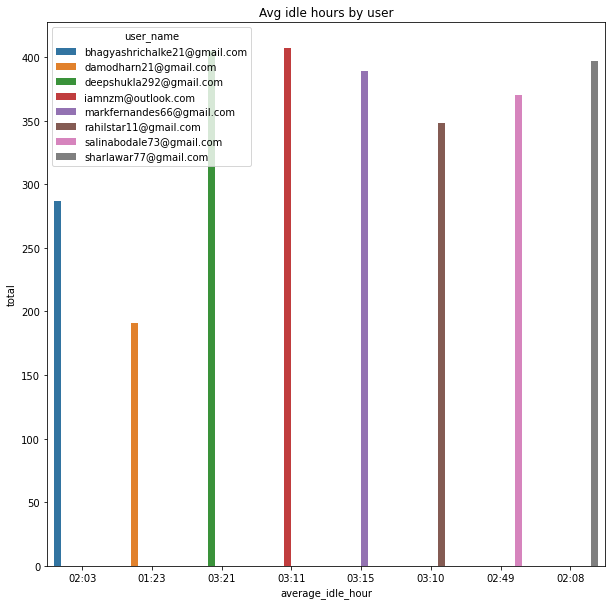

In [12]:
total = user_working_count['total']
plt.figure(figsize = (10,10))
sns.barplot(x = 'average_idle_hour',y=total,data = average_idle_hour,hue='user_name')
plt.title("Avg idle hours by user")
plt.show()